In [3]:
# Jason Luera
# Modern Physics Lab SPR 2019

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd

xaxes = np.array([470, 540, 570, 600, 640])
cor_xaxes = np.multiply(xaxes,1e-9)
print(cor_xaxes)

labels = np.array(['Trial', 4.7e-07, 5.4e-07, 5.7e-07, 6.0e-07, 6.4e-07])
Trial1= np.array([1, 0.583, 0.410, 0.335, 0.357, 0.399])
Trial2= np.array([2, 0.448, 0.448, 0.409, 0.484, 0.515])
Trial3= np.array([3, 0.386, 0.386, 0.350, 0.331, 0.344])


print(labels)
print(Trial1)
print(Trial2)
print(Trial3)
# All print statements show correct amount of numbers in each row.

[4.7e-07 5.4e-07 5.7e-07 6.0e-07 6.4e-07]
['Trial' '4.7e-07' '5.4e-07' '5.7e-07' '6e-07' '6.4e-07']
[1.    0.583 0.41  0.335 0.357 0.399]
[2.    0.448 0.448 0.409 0.484 0.515]
[3.    0.386 0.386 0.35  0.331 0.344]


In [5]:
# Setting as DataFrame with no index and data as separate arrays.
df = pd.DataFrame(data=(Trial1,Trial2,Trial3), columns = labels).set_index('Trial')
df.columns = ['470nm', '540nm', '570nm', '600nm', '640nm']
# Data has been set into a Pandas DataFrame for viewability.
df
# Dropping index column with .drop
# Tried to declare column as index
# sTrials = pd.Series(df.columns['Trial'])
# df1 = df.set_index('Trial')
# df1
# Closest I could get to dropping index column

,470nm,540nm,570nm,600nm,640nm
Trial,,,,,
1.0,0.583,0.410,0.335,0.357,0.399
2.0,0.448,0.448,0.409,0.484,0.515
3.0,0.386,0.386,0.350,0.331,0.344


## What do I do with these results?
* What are some relevant trends of my data?
    * Can I put this in a graph?
* What do my formulas say about how the data reacts?

## Lab Objective
* Use the photoelectric effect to obtain data for stopping voltage and wavelength so that Planck's constant can be experimmentally determined.

### Formulas and Theories
* E = (hc / lambda)
    * Thus
        * e(V + O/) = (hc / lambda)
* The experiment measures to point where the stopping potential just equals the work function of the metal so that
    * V = (hc/e)(1/lambda)
* Planck's constant then can be determined using the value obtained from the slope of the line. 
    * Plot of V vs (1/lambda)

## Analysis of the data finding Planck's Constant.
* Graph Stopping voltage vs 1/lambda.
    * Don't forget error bars.
    * You should have a best and worst fit line so that you may obtain your best estimate of the slope and its uncertainty.
* Use nm^-1 for the x-axis for higher accuracy
* Obtain a least squares value for the slope (In Statistics Lab)
* The slope's value for Planck's Constant can be determined after a bit of algebraic manipulation.

In [28]:
# Importing matplotlib for low level visualization.
import matplotlib.pyplot as plt
df
labels = np.array([4.7e-07, 5.4e-07, 5.7e-07, 6.0e-07, 6.4e-07])
inverselabels = 1 / labels
print(inverselabels)


[2127659.57446809 1851851.85185185 1754385.96491228 1666666.66666667
 1562500.        ]


In [7]:
# Getting plot information here
print("The lowest value is:", df.values.min())
print("The highest value is:", df.values.max())
print("The total range should be from .3 to .6 with the step of .5")
print("The domain should be:",cor_xaxes[0],"to:",cor_xaxes[-1],".")

The lowest value is: 0.331
The highest value is: 0.583
The total range should be from .3 to .6 with the step of .5
The domain should be: 4.7000000000000005e-07 to: 6.4e-07 .


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02978dbeb8>,
      dtype=object)

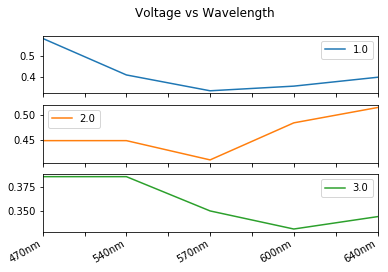

In [26]:
# Plotting with pandas
df1 = df.copy()
df1.T
df1.T.plot(subplots=True, title='Voltage vs Wavelength')

In [39]:
df1['470nm']
df1.loc[1.0]

470nm    0.583
540nm    0.410
570nm    0.335
600nm    0.357
640nm    0.399
Name: 1.0, dtype: float64

Text(0.5, 1.0, 'Voltage vs 1/wavelength')

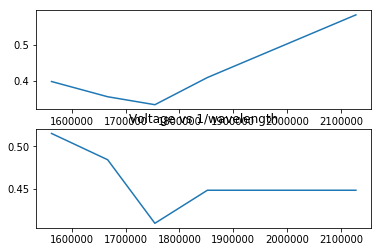

In [65]:
# Plotting with MatLab
s1 = pd.Series(df1['470nm'])
plt.figure(1)
plt.subplot(211)
plt.plot(inverselabels, df1.loc[1.0])
plt.subplot(212)
plt.plot(inverselabels, df1.loc[2.0])
#plt.subplot(213)
#plt.plot(inverselabels, df1.loc[3.0])

plt.title('Voltage vs 1/wavelength')
# Can only get two subplots to work

IndexError: too many indices for array

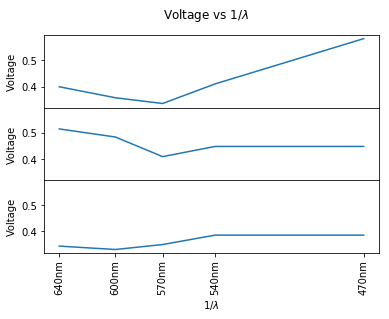

In [86]:
f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.suptitle(r'Voltage vs 1/$\lambda$')
axarr[0].plot(inverselabels, df1.loc[1.0])
axarr[1].plot(inverselabels, df1.loc[2.0])
axarr[2].plot(inverselabels, df1.loc[3.0])
# Bring the subplots closer to each other
f.subplots_adjust(hspace=0)
pltxlabels = ['470nm', '540nm', '570nm', '600nm', '640nm']
# pltxlabels1 = ['640nm', '600nm', '570nm', '540nm', '470nm']
plt.xticks(inverselabels, pltxlabels, rotation='vertical')
# Setting common labels
for ax in axarr.flat:
    ax.set(xlabel=r'1/$\lambda$', ylabel='Voltage')
axarr[0, 0].set_title('Trial 1')